In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('ticks')
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# Enable inline plotting  
%matplotlib inline

In [2]:
print ('Python version ' + sys.version)
print ('Pandas version ' + pd.__version__)
print ('Numpy version ' + np.__version__)

Python version 3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 02:16:08) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.24.2
Numpy version 1.16.4


In [3]:
def plot_MPI(dff, fig_name):

    plt.rcParams['font.size'] = 9
    fig = plt.figure(figsize=(5,5))
    axes = fig.add_subplot(1,1,1)
    width = 0.85 

    dff['Communication'][0] = np.nan

    yerrs = [dff['std_t_IO'].values.transpose().tolist(),dff['std_t_comp'].values.transpose().tolist(),
              dff['std_t_init'].values.transpose().tolist(),dff['std_t_end_loop'].values.transpose().tolist(),
              dff['std_comm'].values.transpose().tolist()]

    dff.index = dff.loc[:,'blocks']
    dff.loc[:,['t_IO','t_comp','t_init','t_end_loop','Communication']].plot(
            color=['blue','yellow','grey','pink','red'],
            linestyle='-',
            yerr=yerrs,
            ax=axes)

    plt.style.use('ggplot')
    sns.set_style('ticks')
    axes.set_xlabel('$N_{Processes}$')   
    axes.set_ylabel('Time (s)')
    plt.xscale('log')
    plt.yscale('log')

    axes.set_ylim(0, 1200)
    axes.set_xlim(1, 210)
    axes.yaxis.grid(which='major', linewidth='0.5', color='grey')
    axes.xaxis.grid(which='major', linewidth='0.5', color='grey')
    axes.yaxis.grid(which='minor', linewidth='0.5', color='grey')
    axes.xaxis.grid(which='minor', linewidth='0.5', color='grey') 
    sns.despine(offset=10, ax=axes)
    plt.tight_layout()
    lgd = plt.legend([r'IO', r'Compute',
                      'Opening Trajectory','Ending_loop',r'Communication'],
                     loc='upper center', bbox_to_anchor=(0.45, -0.25),
                     frameon=False, shadow=True, ncol=2, prop={'size':12})
    
    fig.subplots_adjust(bottom=0.45)
    fig.savefig('{}.pdf'.format(fig_name))

In [11]:
def plot_ga_MPI(dff_ga, dff_no_ga, fig_name):
    plt.rcParams['font.size'] = 9
    fig = plt.figure(figsize=(5,5))
    axes = fig.add_subplot(1,1,1)
    width = 0.85 

    dff_no_ga['Communication'][0] = np.nan
    dff_ga['Communication'][0] = np.nan

    yerrs1 = [dff_ga['std_t_IO'].values.transpose().tolist(),dff_ga['std_t_comp'].values.transpose().tolist(),
              dff_ga['std_t_init'].values.transpose().tolist(),dff_ga['std_t_end_loop'].values.transpose().tolist(),
              dff_ga['std_comm'].values.transpose().tolist()]

    dff_ga.index = dff_ga.loc[:,'blocks']
    dff_ga.loc[:,['t_IO','t_comp','t_init','t_end_loop','Communication']].plot(color=['blue','yellow','grey','pink','red'],yerr=yerrs1,ax=axes)

    yerrs2 = [dff_no_ga['std_t_IO'].values.transpose().tolist(),dff_no_ga['std_t_comp'].values.transpose().tolist(),
              dff_no_ga['std_t_init'].values.transpose().tolist(),dff_no_ga['std_t_end_loop'].values.transpose().tolist(),
              dff_no_ga['std_comm'].values.transpose().tolist()]

    dff_no_ga.index = dff_no_ga.loc[:,'blocks']
    dff_no_ga.loc[:,['t_IO','t_comp','t_init','t_end_loop','Communication']].plot(
              color=['blue','yellow','grey','pink','red'],linestyle='--',yerr=yerrs2,ax=axes)

    plt.style.use('ggplot')
    sns.set_style('ticks')
    axes.set_xlabel('$N_{Processes}$')   
    axes.set_ylabel('Time (s)')
    plt.xscale('log')
    plt.yscale('log')

    axes.set_ylim(0, 1200)
    axes.set_xlim(1, 210)
    axes.yaxis.grid(which='major', linewidth='0.5', color='grey')
    axes.xaxis.grid(which='major', linewidth='0.5', color='grey')
    axes.yaxis.grid(which='minor', linewidth='0.5', color='grey')
    axes.xaxis.grid(which='minor', linewidth='0.5', color='grey') 
    sns.despine(offset=10, ax=axes)
    plt.tight_layout()
    lgd = plt.legend(['t_IO ga','t_comp ga','Opening traj ga','ending loop ga','t_comm ga','t_IO No-ga','t_comp No-ga',
                      'Opening traj No-ga','ending loop No-ga','t_comm No-ga'],loc='upper center', bbox_to_anchor=(0.45, -0.25),
                     frameon=False, shadow=True, ncol=2, prop={'size':12})
    
    fig.subplots_adjust(bottom=0.45)
    fig.savefig('{}.pdf'.format(fig_name))

In [4]:
data1 = 'dff-comm-updated-rmsd-traj-split-chain-reader-GA.csv'     # With GA
data2 = 'dff-comm-updated-rmsd-traj-split-chain-reader.csv'        # Without GA

In [5]:
dff_ga = pd.read_csv(data1)
dff_mpi = pd.read_csv(data2)

/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


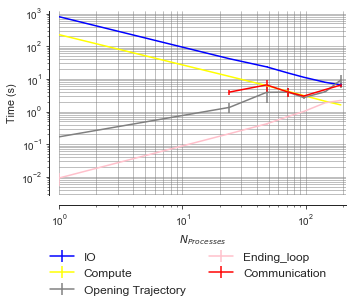

In [6]:
plot_MPI(dff_mpi, 'IO_compute_scaling_traj_splitting-chain-reader')

/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, o

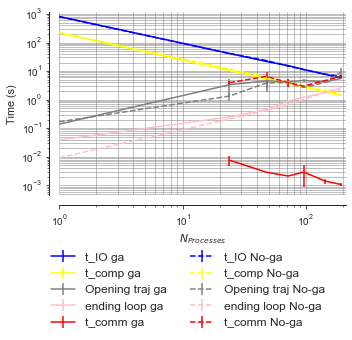

In [12]:
plot_ga_MPI(dff_ga, dff_mpi, 'Comparison_IO_compute_scaling_traj_splitting-chain-reader')